# Data Science Group Project
## COSC 3337
## Team Members: Clark Nelson, Cesar Campos, Leo Quezada

# Dataset information


### Variables
- track: The Name of the track.

- artist: The Name of the Artist.

- uri: The resource identifier for the track.

- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:

- instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:

- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

- duration_ms:  The duration of the track in milliseconds.

- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

- sections: The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

- target: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

  The condition of a track being 'flop' is as follows:

    - The track must not appear in the 'hit' list of that decade.
    - The track's artist must not appear in the 'hit' list of that decade.
    - The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
    - The track's genre must not have a song in the 'hit' list.
    - The track must have 'US' as one of its markets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams as rc

rc['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

hit_df = pd.read_csv('dataset-of-10s.csv')
hit_df.head()

track                          artist  \
0                          Wild Things                    Alessia Cara   
1                            Surfboard                       Esquivel!   
2                         Love Someone                    Lukas Graham   
3  Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4        Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:2ZyuwVvV6Z3XJaXIFbspeE         0.741   0.626    1    -4.826   
1  spotify:track:61APOtq25SCMuK0V5w2Kgp         0.447   0.247    5   -14.661   
2  spotify:track:2JqnpexlO9dmvjUMCaLCLJ         0.550   0.415    9    -6.557   
3  spotify:track:0cjfLhk8WJ3etPTCseKXtk         0.502   0.648    0    -5.698   
4  spotify:track:1lItf5ZXJc1by9SbPeljFd         0.807   0.887    1    -3.892   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.0886       0.02000             0.000    0.0828    0.706   
1     0       0.0346       0.87100             0.814    0.0946    0.250   
2     0       0.0520       0.16100             0.000    0.1080    0.274   
3     0       0.0527       0.00513             0.000    0.2040    0.291   
4     1       0.2750       0.00381             0.000    0.3910    0.780   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  108.029       188493               4    41.18681        10       1  
1  155.489       176880               3    33.18083         9       0  
2  172.065       205463               4    44.89147         9       1  
3   91.837       193043               4    29.52521         7       0  
4  160.517       144244               4    24.99199         8       1

In [2]:
hit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


In [3]:
hit_df.describe()

danceability       energy          key     loudness         mode  \
count   6398.000000  6398.000000  6398.000000  6398.000000  6398.000000   
mean       0.568163     0.667756     5.283526    -7.589796     0.645514   
std        0.191103     0.240721     3.606216     5.234592     0.478395   
min        0.062200     0.000251     0.000000   -46.655000     0.000000   
25%        0.447000     0.533000     2.000000    -8.425000     0.000000   
50%        0.588000     0.712500     5.000000    -6.096500     1.000000   
75%        0.710000     0.857000     8.000000    -4.601250     1.000000   
max        0.981000     0.999000    11.000000    -0.149000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  6398.000000   6398.000000       6398.000000  6398.000000  6398.000000   
mean      0.098018      0.216928          0.165293     0.196700     0.443734   
std       0.097224      0.296835          0.318736     0.166148     0.245776   
min       0.022500      0.000000          0.000000     0.016700     0.000000   
25%       0.038825      0.008533          0.000000     0.096800     0.240000   
50%       0.057200      0.067050          0.000017     0.126000     0.434000   
75%       0.112000      0.311000          0.057650     0.249000     0.628000   
max       0.956000      0.996000          0.995000     0.982000     0.976000   

             tempo   duration_ms  time_signature   chorus_hit     sections  \
count  6398.000000  6.398000e+03     6398.000000  6398.000000  6398.000000   
mean    122.353871  2.367042e+05        3.930916    41.028399    10.316505   
std      29.847389  8.563698e+04        0.377469    19.568827     3.776011   
min      39.369000  2.985300e+04        0.000000     0.000000     2.000000   
25%      98.091250  1.932068e+05        4.000000    28.059135     8.000000   
50%     121.070000  2.212465e+05        4.000000    36.265365    10.000000   
75%     141.085000  2.593165e+05        4.000000    48.292538    12.000000   
max     210.977000  1.734201e+06        5.000000   213.154990    88.000000   

            target  
count  6398.000000  
mean      0.500000  
std       0.500039  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000

In [4]:
# getting a count of unique track names
count = len(hit_df['track'])
unique_track = len(pd.unique(hit_df['track']))
unique_track / count

0.9324788996561425

In [5]:
# getting a count of unique artist names
unique_artist = len(pd.unique(hit_df['artist']))
unique_artist / count

0.5243826195686152

'uri' is excluded as it is a url to the song and has no relevance to the predictive or inferential capabilities of the data. 'track' and 'artist' are both excluded as they are categorical variable that are mostly unique. Attempting to encode and use them would only lead to overfitting.

In [6]:
# dropping unused variables
df = hit_df.copy(deep=True)
df.drop('uri', inplace=True, axis=1)
df.drop('track', inplace=True, axis=1)
df.drop('artist', inplace=True, axis=1)
df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.741   0.626    1    -4.826     0       0.0886       0.02000   
1         0.447   0.247    5   -14.661     0       0.0346       0.87100   
2         0.550   0.415    9    -6.557     0       0.0520       0.16100   
3         0.502   0.648    0    -5.698     0       0.0527       0.00513   
4         0.807   0.887    1    -3.892     1       0.2750       0.00381   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0             0.000    0.0828    0.706  108.029       188493               4   
1             0.814    0.0946    0.250  155.489       176880               3   
2             0.000    0.1080    0.274  172.065       205463               4   
3             0.000    0.2040    0.291   91.837       193043               4   
4             0.000    0.3910    0.780  160.517       144244               4   

   chorus_hit  sections  target  
0    41.18681        10       1  
1    33.18083         9       0  
2    44.89147         9       1  
3    29.52521         7       0  
4    24.99199         8       1

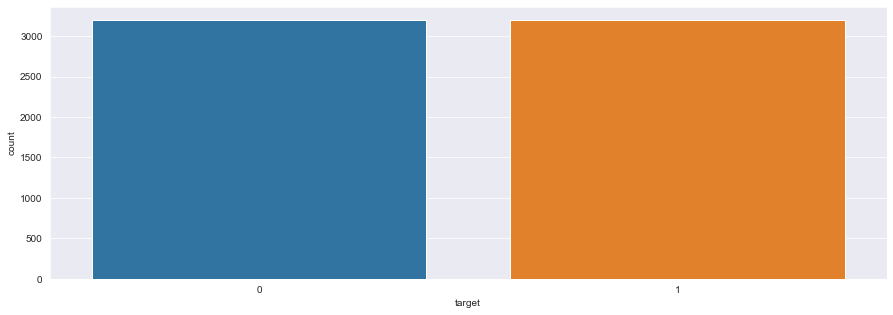

In [7]:
sns.countplot(x=df['target'])
plt.show()

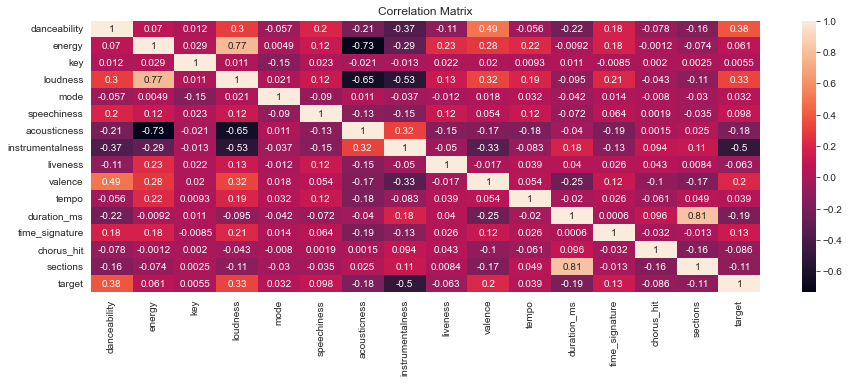

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

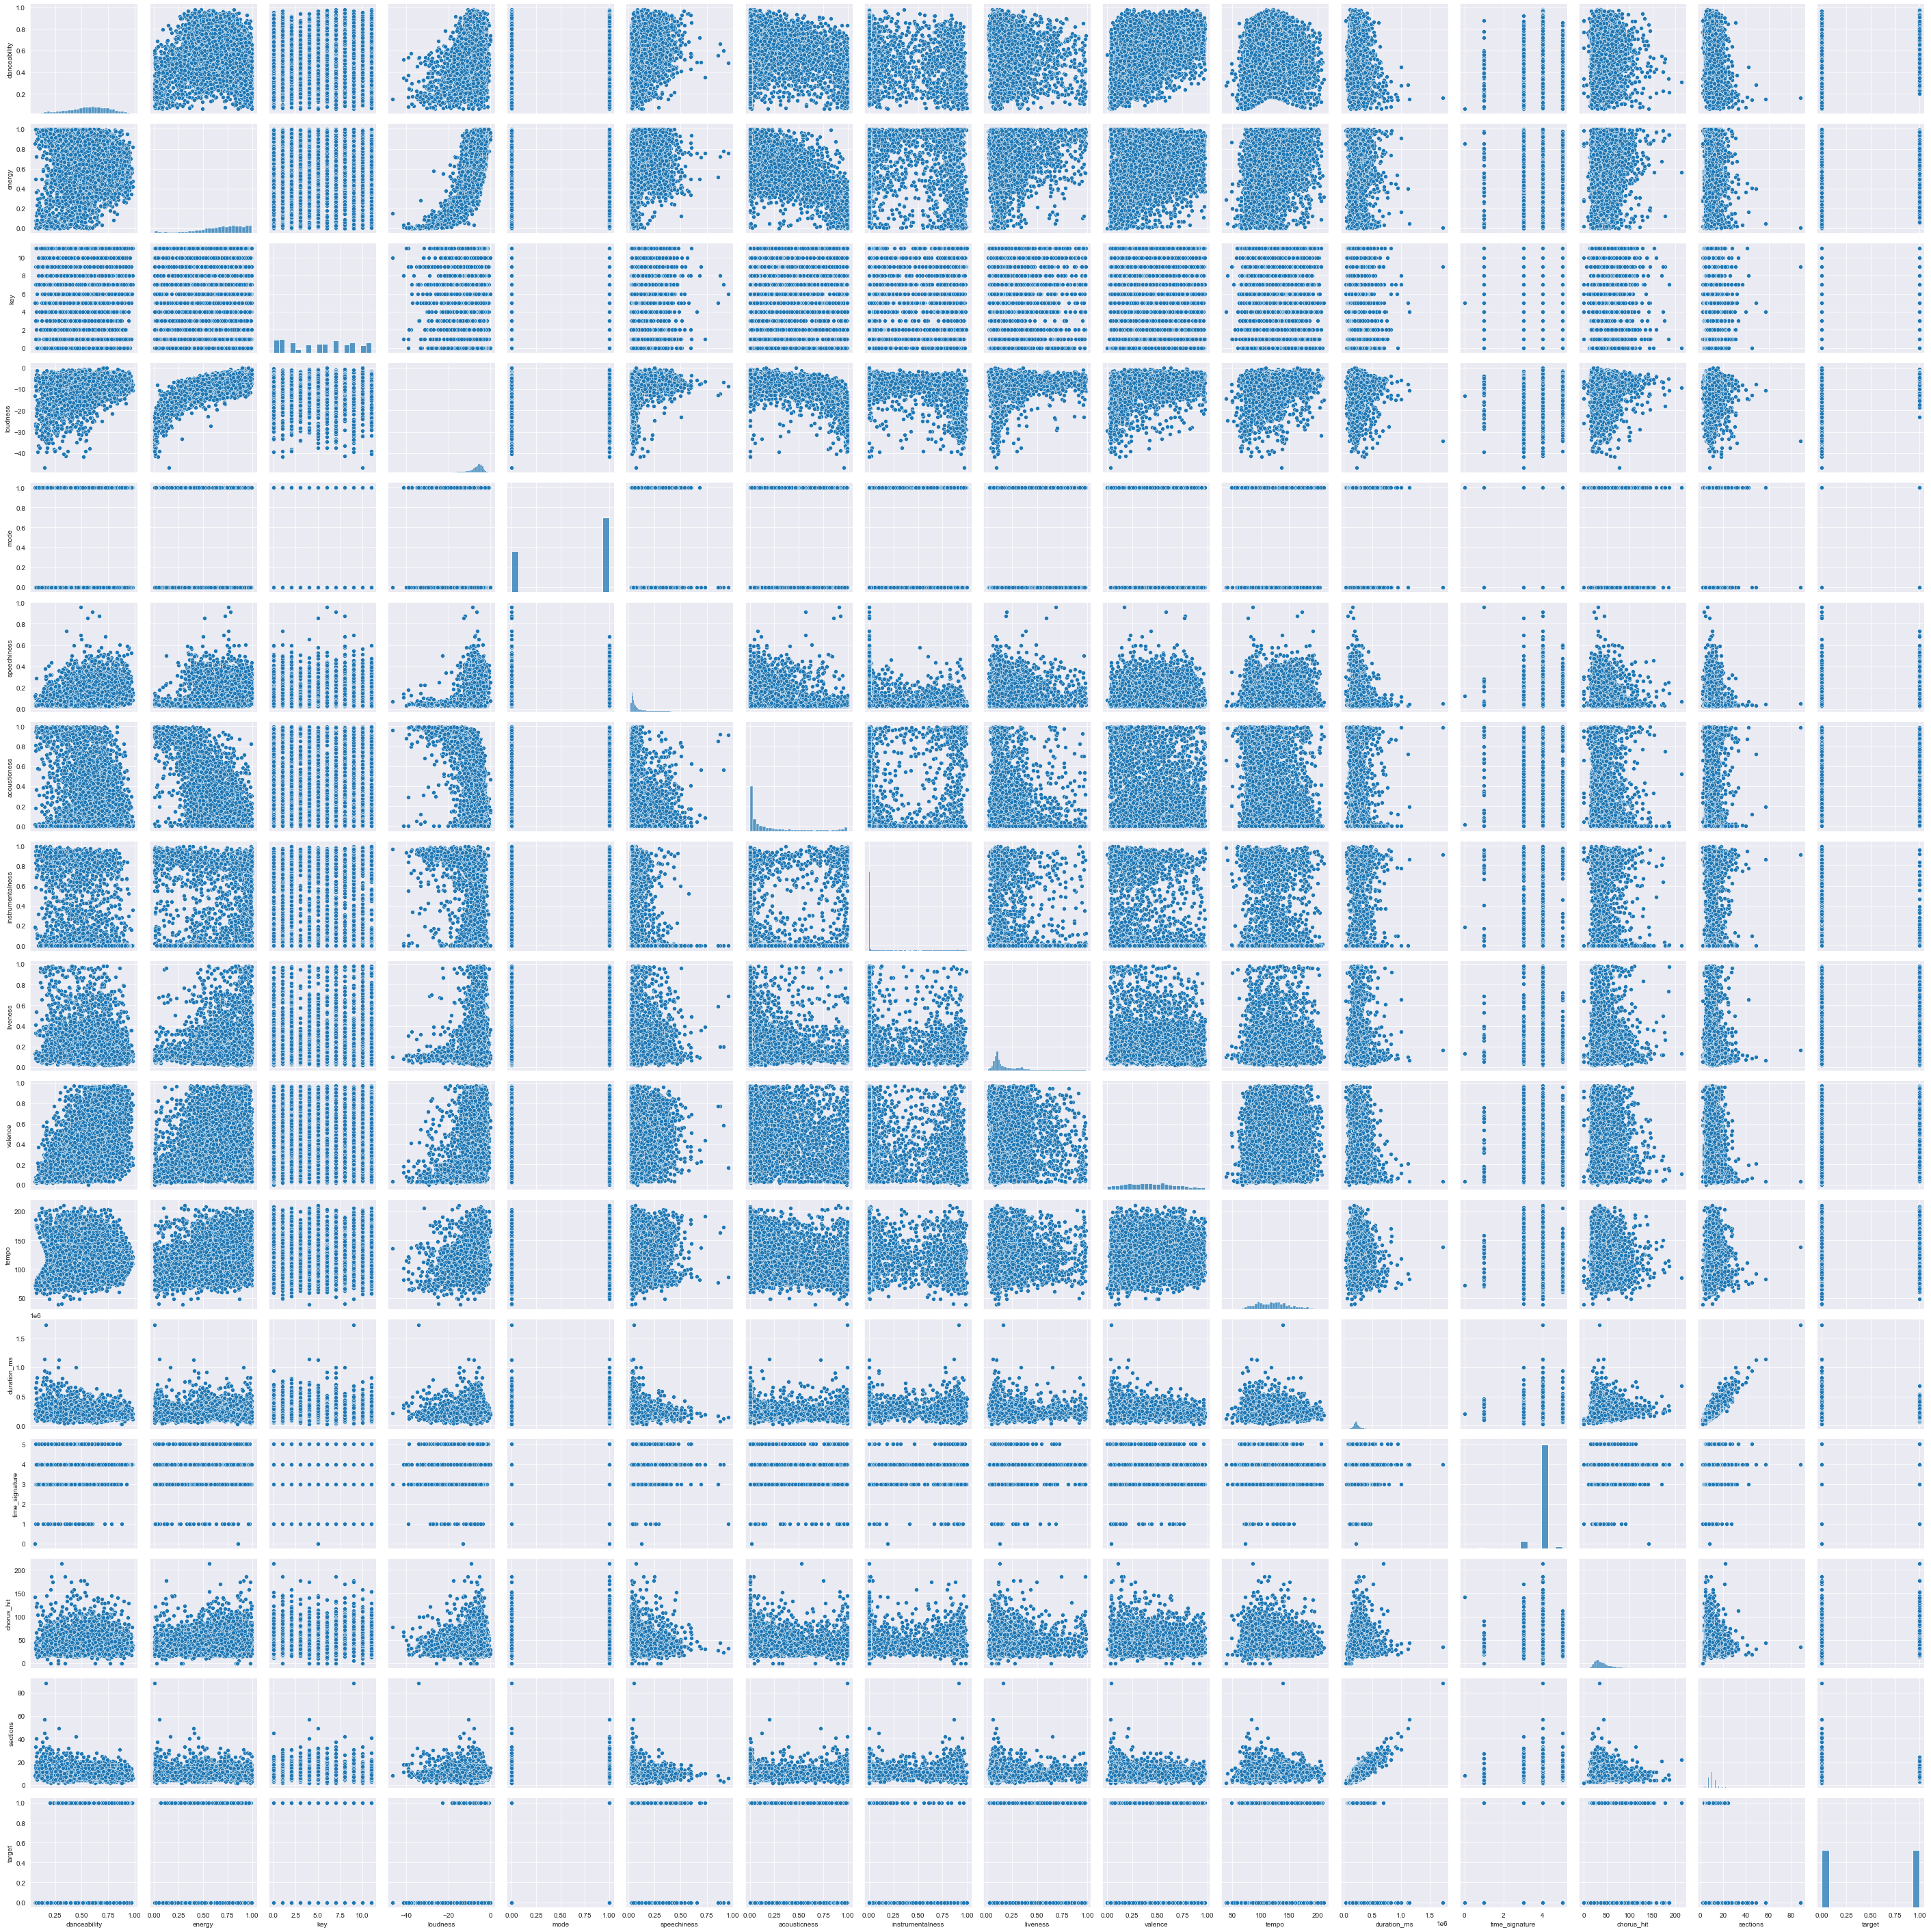

In [9]:
sns.pairplot(df)
plt.show()


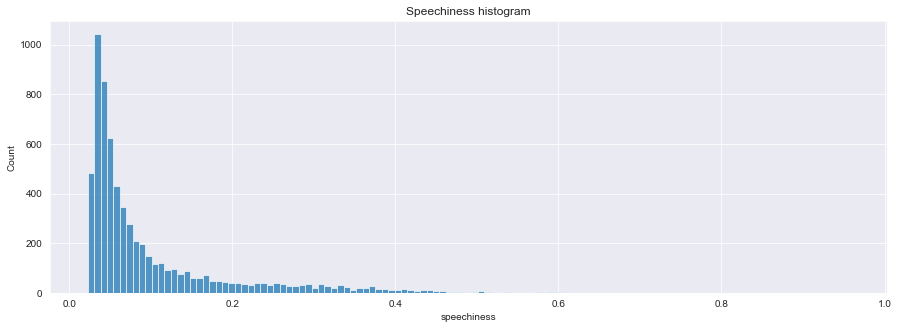

In [10]:
sns.histplot(
    x    = 'speechiness',
    data = df
)
plt.title('Speechiness histogram')
plt.show()

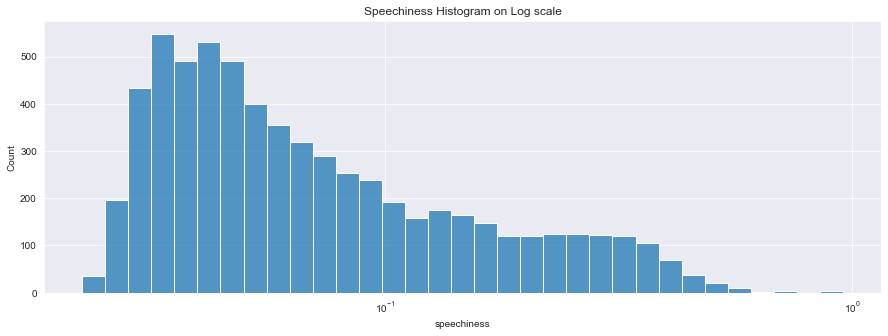

In [11]:
sns.histplot(
    x        = 'speechiness',
    data     = df,
    log_scale = True
)
plt.title('Speechiness Histogram on Log scale')
plt.show()

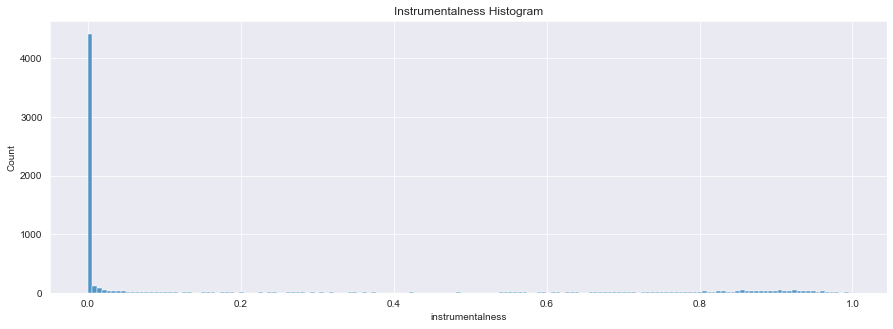

In [12]:
sns.histplot(
    x        = 'instrumentalness',
    data     = df
)
plt.title('Instrumentalness Histogram')
plt.show()

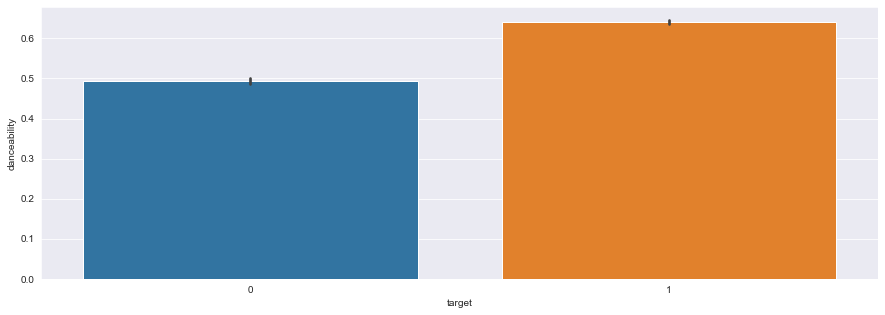

In [13]:
sns.barplot(
    x    = 'target',
    y    = 'danceability',
    data = df
)
locs, labels = plt.xticks()

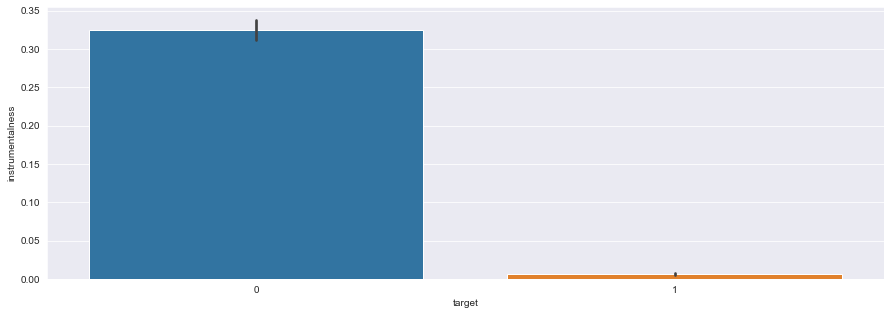

In [14]:
sns.barplot(
    x    = 'target',
    y    = 'instrumentalness',
    data = df
)
locs, labels = plt.xticks()

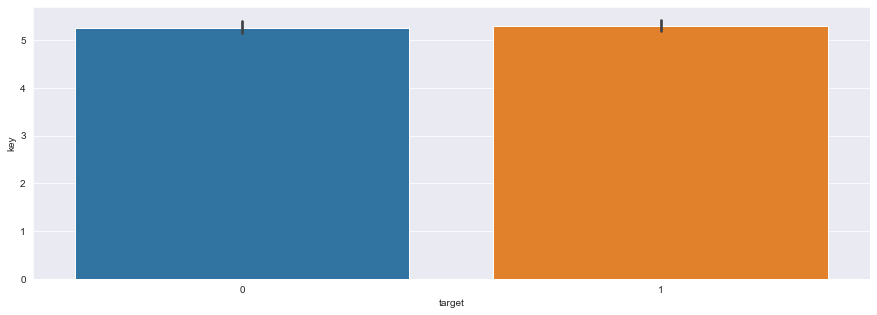

In [15]:
sns.barplot(
    x    = 'target',
    y    = 'key',
    data = df
)
locs, labels = plt.xticks()

Data is scaled with a robust scaler to better compensate for the significant outliers in many of the variables

In [16]:
from sklearn.preprocessing import RobustScaler

# all columns except 'target'
X = df.drop('target', axis=1)
y = df['target']

# create our scaler object
scaler = RobustScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)
X.head()

danceability    energy       key  loudness  mode  speechiness  \
0      0.581749 -0.266975 -0.666667  0.332265  -1.0     0.429108   
1     -0.536122 -1.436728  0.000000 -2.239817  -1.0    -0.308849   
2     -0.144487 -0.918210  0.666667 -0.120432  -1.0    -0.071063   
3     -0.326996 -0.199074 -0.833333  0.104217  -1.0    -0.061496   
4      0.832700  0.538580 -0.666667  0.576528   0.0     2.976426   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0     -0.155554         -0.000289 -0.283837  0.701031 -0.303323    -0.495441   
1      2.657972         14.119399 -0.206307 -0.474227  0.800558    -0.671104   
2      0.310612         -0.000289 -0.118265 -0.412371  1.186103    -0.238747   
3     -0.204716         -0.000289  0.512484 -0.368557 -0.679936    -0.426616   
4     -0.209080         -0.000289  1.741130  0.891753  0.917505    -1.164768   

   time_signature  chorus_hit  sections  
0             0.0    0.243234      0.00  
1            -1.0   -0.152448     -0.25  
2             0.0    0.426330     -0.25  
3             0.0   -0.333120     -0.75  
4             0.0   -0.557167     -0.50

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
        

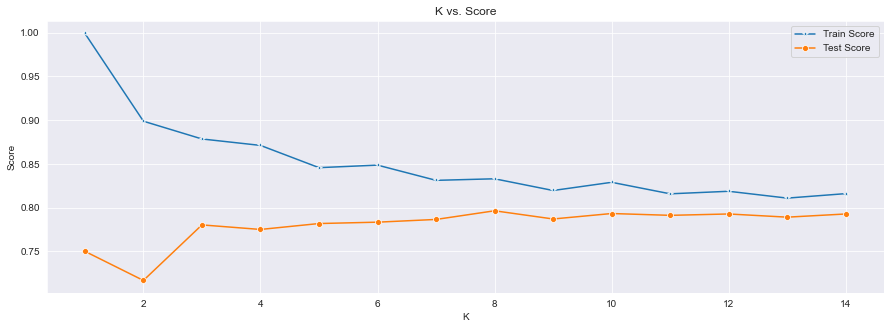

In [19]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [20]:
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7890625

In [21]:
#kNN CV
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X_train, y_train, cv = 10)
print(cv_scores)
print('')
print(np.mean(cv_scores))

[0.80803571 0.79910714 0.79017857 0.78125    0.796875   0.77901786
 0.78571429 0.79017857 0.76733781 0.76957494]

0.7867269894534996


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)

knn_conf_mat = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(knn_conf_mat)

              precision    recall  f1-score   support

           0       0.91      0.65      0.75       960
           1       0.72      0.93      0.82       960

    accuracy                           0.79      1920
   macro avg       0.81      0.79      0.78      1920
weighted avg       0.81      0.79      0.78      1920

[[620 340]
 [ 65 895]]


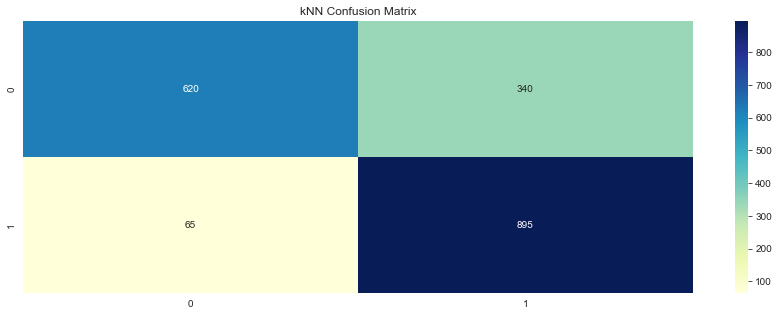

In [23]:
sns.heatmap(
    knn_conf_mat, 
    annot = True, 
    fmt = 'g',
    cmap="YlGnBu"
)
plt.title('kNN Confusion Matrix')
plt.show()

/Users/clarknelson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


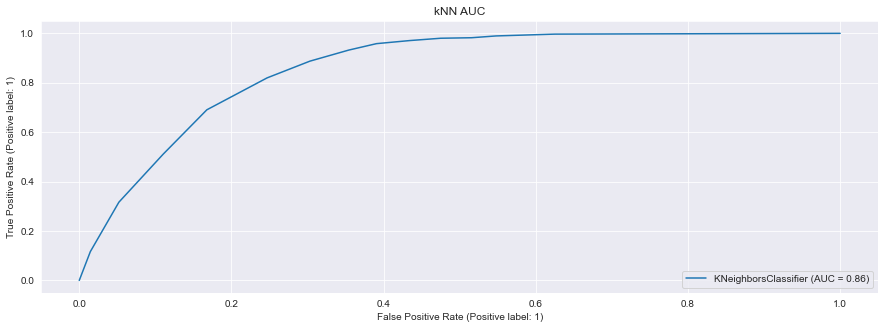

In [24]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knn, X_test, y_test)
plt.title('kNN AUC')
plt.show()

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
#log CV
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logmodel, X_train, y_train, cv = 10)
print(cv_scores)
print('')
print(np.mean(cv_scores))

[0.80580357 0.78794643 0.83482143 0.80133929 0.828125   0.80357143
 0.828125   0.80133929 0.77852349 0.80536913]

0.8074964046021094


In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

log_conf_mat = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
print(log_conf_mat)


              precision    recall  f1-score   support

           0       0.86      0.71      0.78       960
           1       0.75      0.89      0.82       960

    accuracy                           0.80      1920
   macro avg       0.81      0.80      0.80      1920
weighted avg       0.81      0.80      0.80      1920

[[683 277]
 [107 853]]


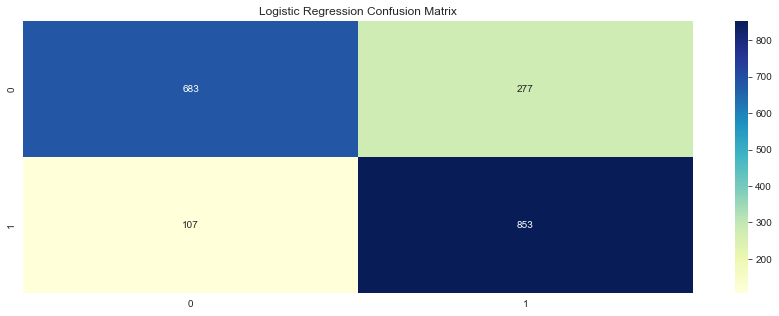

In [29]:
sns.heatmap(
    log_conf_mat, 
    annot = True, 
    fmt = 'g',
    cmap="YlGnBu"
)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

/Users/clarknelson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


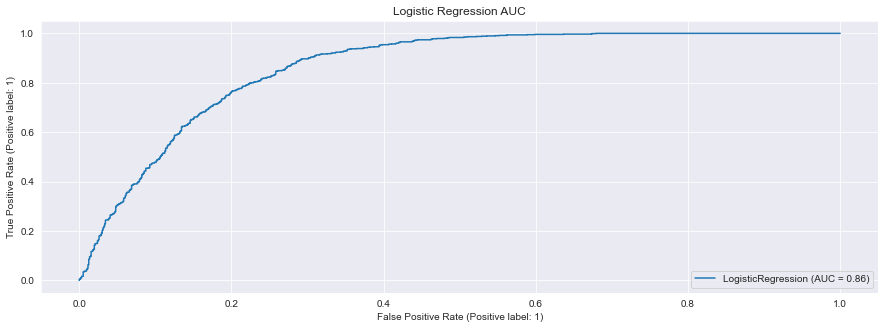

In [30]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logmodel, X_test, y_test) 
plt.title('Logistic Regression AUC')

plt.show()